In [2]:
import ipdb
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pylab as pylab
import cartopy
import cartopy.crs as ccrs
from utils import constants as cnst
from eod import msg
from utils import u_grid, u_interpolate as u_int, u_darrays as uda
import datetime
import salem
from salem import get_demo_file, DataLevels, GoogleVisibleMap, Map

pylab.rcParams['figure.figsize'] = (50., 50.)
%matplotlib inline

In [1]:
cd ..

/home/ck/pythonWorkspace/proj_CEH


In [3]:
grid = u_grid.make(np.linspace(-20,55), np.linspace(0,36), 3)

In [55]:
#tag = 'MFG'
tag = 'MSG'
testfile = '/media/ck/Elements/Africa/WestAfrica/NFLICS/MCS_TIR/real_time_wavelet/2020/09/06/IR_wavelet_BT_20200906_*.nc'
data = xr.open_mfdataset(testfile)
tstep_old = data.isel(time=0).load()

/home/ck/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: In xarray version 0.15 the default behaviour of `open_mfdataset`
will change. To retain the existing behavior, pass
combine='nested'. To use future default behavior, pass
combine='by_coords'. See
http://xarray.pydata.org/en/stable/combining.html#combining-multi

  after removing the cwd from sys.path.
/home/ck/miniconda3/lib/python3.7/site-packages/xarray/backends/api.py:933: FutureWarning: The datasets supplied have global dimension coordinates. You may want
to use the new `combine_by_coords` function (or the
`combine='by_coords'` option to `open_mfdataset`) to order the datasets
before concatenation. Alternatively, to continue concatenating based
on the order the datasets are supplied in future, please use the new
`combine_nested` function (or the `combine='nested'` option to
open_mfdataset).
  from_openmfds=True,


In [56]:
tstep_old

<xarray.Dataset>
Dimensions:  (lat: 566, lon: 667)
Coordinates:
  * lon      (lon) float64 -19.0 -18.97 -18.95 -18.92 ... -1.106 -1.079 -1.052
  * lat      (lat) float64 4.0 4.027 4.054 4.081 ... 18.89 18.92 18.95 18.97
    time     datetime64[ns] 2020-09-06
Data variables:
    power    (lat, lon) float64 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    BT       (lat, lon) int16 1882 1771 1781 1985 1973 ... 2150 2190 2208 2220
Attributes:
    radii:              [ 2  2  3  4  6  8 11 16 21]
    scales_rounded:     [ 12  16  22  29  40  53  72  97 130]
    scales_original:    [ 12.          16.16680292  21.78045973  29.34336666 ...
    cutout_T:           -40
    cutout_minPixelNb:  78.53981633974483

In [57]:
tir = tstep_old['BT']

In [58]:
tir.values = np.array(tir.values/100, dtype=float)
tir.values[tir.values>-60] = np.nan

In [59]:
tir

<xarray.DataArray 'BT' (lat: 566, lon: 667)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
  * lon      (lon) float64 -19.0 -18.97 -18.95 -18.92 ... -1.106 -1.079 -1.052
  * lat      (lat) float64 4.0 4.027 4.054 4.081 ... 18.89 18.92 18.95 18.97
    time     datetime64[ns] 2020-09-06

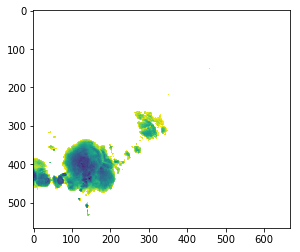

In [60]:
plt.imshow(tir)

In [79]:
g = GoogleVisibleMap(x=[-15, 10], y=[10, 25],
                     scale=2,  # scale is for more details
                     maptype='terrain')  # try out also: 'terrain'

Text(0.5,1,'Google static map')

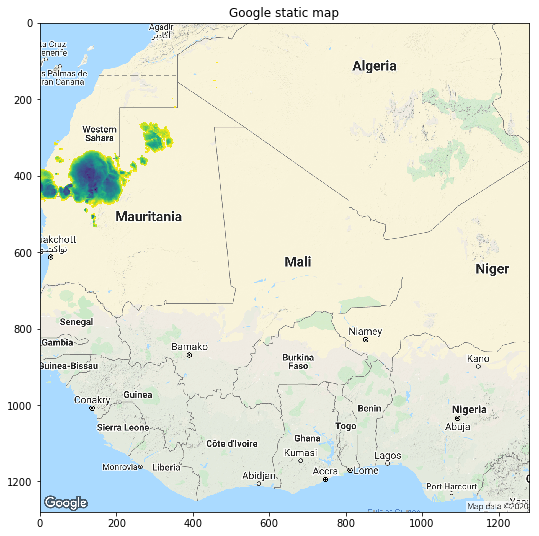

In [80]:
f = plt.figure(figsize=(10,9))
ax1 = f.add_subplot(111)
# the google static image is a standard rgb image
ggl_img = g.get_vardata()
ax1.imshow(ggl_img)
ax1.pcolormesh(tir)
ax1.set_title('Google static map')


{'imshow': <matplotlib.image.AxesImage at 0x7f5f2bd61d90>,
 'contour': [],
 'contourf': []}

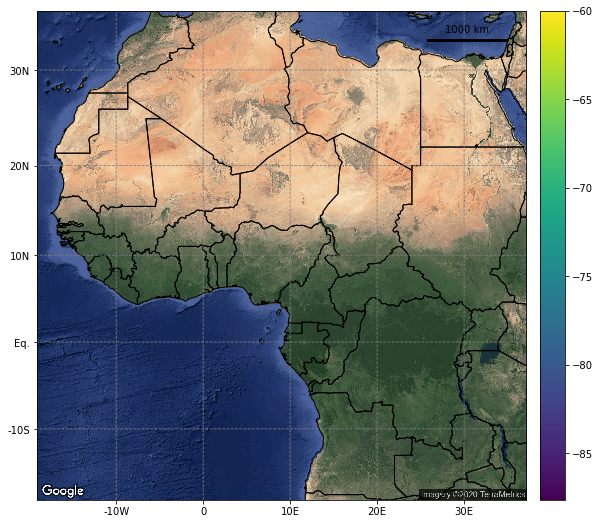

In [64]:
f = plt.figure(figsize=(10,9))
ax1 = f.add_subplot(111)
# make a map of the same size as the image (no country borders)
sm = Map(g.grid, factor=1, countries=True)

sm.set_rgb(ggl_img)  # add the background rgb image
sm.set_scale_bar(location=(0.88, 0.94))  # add scale
sm.set_data(tir)
sm.visualize()  # plot it